In [125]:
import pandas as pd
filename = "Dataset_SmatWatcher2.csv"
df = pd.read_csv("datasets/" + filename)
df.columns

Index(['_id', 'metadata.speed', 'metadata.bateria', 'metadata.numSV',
       'metadata.dateUtcIso', 'metadata.accH', 'metadata.hMSL', 'metadata.lng',
       'metadata.lat'],
      dtype='object')

In [126]:
import numpy as np

latlng = df[['metadata.lat','metadata.lng']] #.sample(n=10000)

# latlng.plot.scatter(x='metadata.lng',y='metadata.lat', alpha=0.01)

X = latlng.to_numpy()

In [127]:
from sklearn.cluster import KMeans
kmeans = KMeans()
y_pred = kmeans.fit_predict(X)
set(y_pred)

{0, 1, 2, 3, 4, 5, 6, 7}

In [128]:
kmeans.cluster_centers_

array([[-20.241461  , -40.2438517 ],
       [-20.24288969, -40.24529588],
       [-20.24202325, -40.24474887],
       [-20.24209648, -40.24532414],
       [-20.2411726 , -40.24417085],
       [-20.24162308, -40.24443508],
       [-20.24616996, -40.24348119],
       [-20.2424719 , -40.24491342]])

In [129]:
unique, counts = np.unique(y_pred, return_counts=True)
distribution = counts/sum(counts)
distribution

array([0.10093272, 0.03646902, 0.14175519, 0.15559235, 0.27558756,
       0.10628824, 0.00077093, 0.182604  ])

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

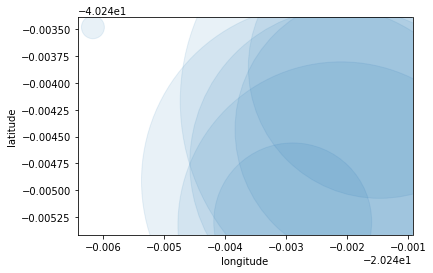

In [130]:
df = pd.DataFrame(kmeans.cluster_centers_, columns=['longitude','latitude'])
df['counts'] = counts
df.plot(kind="scatter", x="longitude", y="latitude", s="counts", alpha=0.1)

In [131]:
df.to_json("static/" + "Dataset_SmatWatcher2.json")